In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
eda = pd.read_csv('EDA.csv', header=None)
temp = pd.read_csv('TEMP.csv', header=None)
print(eda)
print(temp)

                  0
0      1.500966e+09
1      4.000000e+00
2      0.000000e+00
3      2.264140e-01
4      2.878140e-01
...             ...
27285  1.031350e+00
27286  1.030071e+00
27287  1.031350e+00
27288  1.024954e+00
27289  1.030071e+00

[27290 rows x 1 columns]
                  0
0      1.499685e+09
1      4.000000e+00
2      3.822100e+02
3      3.822100e+02
4      3.822100e+02
...             ...
26549  3.149000e+01
26550  3.151000e+01
26551  3.151000e+01
26552  3.151000e+01
26553  3.151000e+01

[26554 rows x 1 columns]


In [62]:
print(df_combined.head())

        EDA    TEMP  label
0  4.000000    4.00      0
1  0.000000  382.21      1
2  0.226414  382.21      1
3  0.287814  382.21      1
4  0.294210  382.21      1


In [64]:
X_features = df_combined[['EDA', 'TEMP']]
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df_combined['label'] = kmeans.fit_predict(X_features)

print("Label distribution:\n", df_combined['label'].value_counts())

Label distribution:
 label
0    26549
1        4
Name: count, dtype: int64


In [65]:
X = df_combined[['EDA', 'TEMP']]
y = df_combined['label']

In [69]:
print(df_combined.groupby('label').mean())


            EDA        TEMP
label                      
0      0.854410   32.808865
1      0.202109  382.210000


In [70]:
df_combined['label'] = df_combined['label'].map({0: 'non-stress', 1: 'stress'})  # or vice versa


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a classifier (Random Forest here)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5311

    accuracy                           1.00      5311
   macro avg       1.00      1.00      1.00      5311
weighted avg       1.00      1.00      1.00      5311


Confusion matrix:


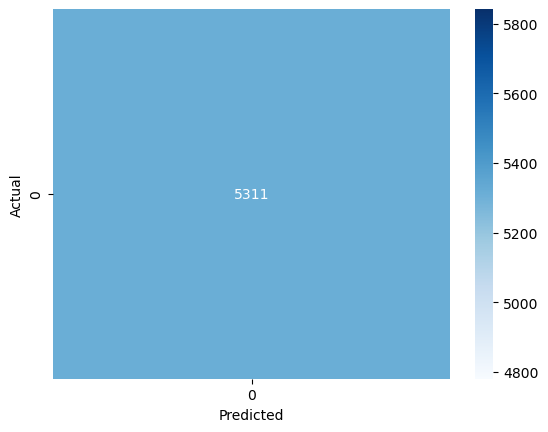

In [67]:
y_pred = clf.predict(X_test)

print("\nClassification report:")
print(classification_report(y_test, y_pred))

print("\nConfusion matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

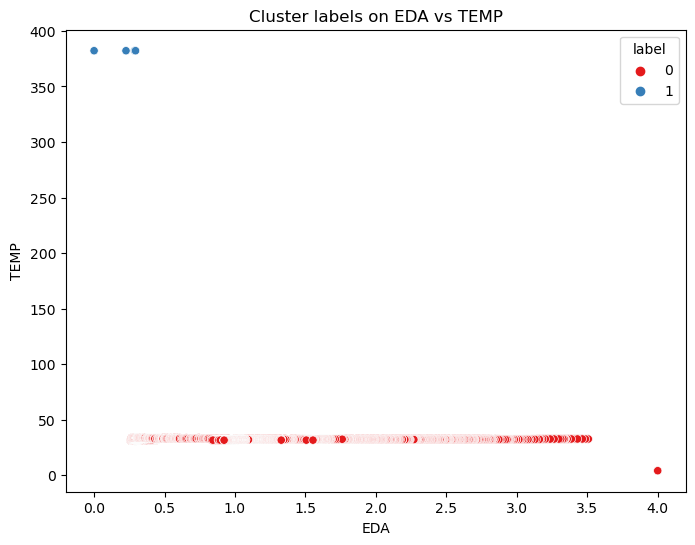

In [68]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='EDA', y='TEMP', hue='label', data=df_combined, palette='Set1')
plt.title('Cluster labels on EDA vs TEMP')
plt.show()

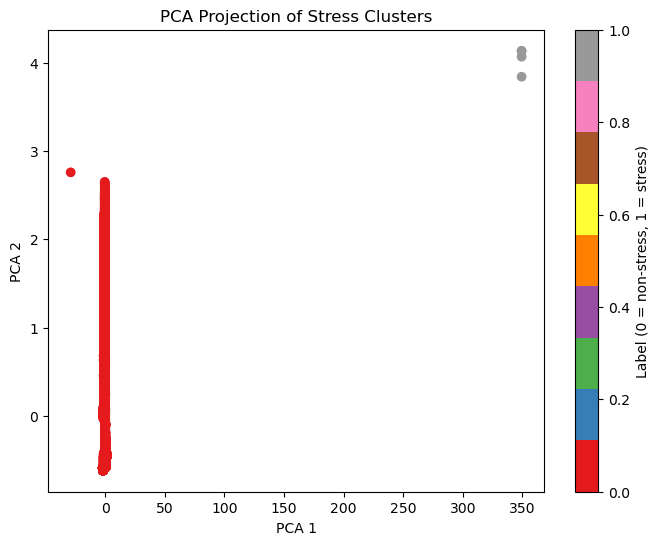

In [72]:
from sklearn.decomposition import PCA

# Map string labels to integers
label_mapping = {'non-stress': 0, 'stress': 1}
df_combined['label_num'] = df_combined['label'].map(label_mapping)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_combined[['EDA', 'TEMP']])

# Plot PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_combined['label_num'], cmap='Set1')
plt.title('PCA Projection of Stress Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Label (0 = non-stress, 1 = stress)')
plt.show()
